i am using pandas library for read data and perfrom eda and preprocessing on the data 

In [344]:
import pandas as pd 
df=pd.read_csv("WA_FnTelco-Customer-Churn.csv")

In [345]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [346]:
df.shape

(7043, 21)

In [347]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [348]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [349]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [350]:
x=df[['customerID','tenure']]

In [351]:
x.head(3)

,customerID,tenure
0,7590-VHVEG,1
1,5575-GNVDE,34
2,3668-QPYBK,2


In [352]:
max_tenure=x["tenure"].max()
max_tenure


np.int64(72)

In [353]:
x["Recency"]=max_tenure-x["tenure"]

C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\1248012759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Recency"]=max_tenure-x["tenure"]


In [354]:
x.head()

,customerID,tenure,Recency
0,7590-VHVEG,1,71
1,5575-GNVDE,34,38
2,3668-QPYBK,2,70
3,7795-CFOCW,45,27
4,9237-HQITU,2,70


In [355]:
x["Monetary"]=df["TotalCharges"]

C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\4092724173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Monetary"]=df["TotalCharges"]


In [356]:
x.head()

,customerID,tenure,Recency,Monetary
0,7590-VHVEG,1,71,29.85
1,5575-GNVDE,34,38,1889.5
2,3668-QPYBK,2,70,108.15
3,7795-CFOCW,45,27,1840.75
4,9237-HQITU,2,70,151.65


In [357]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [358]:
y=df[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']]

In [359]:
y.head()

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,No,Yes,No,No,No,No
1,Yes,No,Yes,No,Yes,No,No,No
2,Yes,No,Yes,Yes,No,No,No,No
3,No,No phone service,Yes,No,Yes,Yes,No,No
4,Yes,No,No,No,No,No,No,No


In [360]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [361]:
df["PhoneService"]=df["PhoneService"].map({"No":0,"Yes":1})
df["OnlineSecurity"]=df["OnlineSecurity"].map({'No':0, 'Yes':1, 'No internet service':0})
df["OnlineBackup"]=df["OnlineBackup"].map({'No':0, 'Yes':1, 'No internet service':0})
df["DeviceProtection"]=df["DeviceProtection"].map({'No':0, 'Yes':1, 'No internet service':0})
df["TechSupport"]=df["TechSupport"].map({'No':0, 'Yes':1, 'No internet service':0})
df["StreamingTV"]=df["StreamingTV"].map({'No':0, 'Yes':1, 'No internet service':0})
df["StreamingMovies"]=df["StreamingMovies"].map({'No':0, 'Yes':1, 'No internet service':0})
df["MultipleLines"]=df["MultipleLines"].map({'No phone service':0, 'No':0, 'Yes':1})

In [362]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [363]:
print(df[['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].dtypes)


PhoneService        int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
dtype: object


In [364]:
cols = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Sum across the columns for each row
x["Frequency"]  = df[cols].sum(axis=1)

# Check the result



C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\3921692785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Frequency"]  = df[cols].sum(axis=1)


In [365]:
x.head()

,customerID,tenure,Recency,Monetary,Frequency
0,7590-VHVEG,1,71,29.85,1
1,5575-GNVDE,34,38,1889.5,3
2,3668-QPYBK,2,70,108.15,3
3,7795-CFOCW,45,27,1840.75,3
4,9237-HQITU,2,70,151.65,1


In [366]:
x['Monetary'] = pd.to_numeric(x['Monetary'], errors='coerce')


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\2742215567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Monetary'] = pd.to_numeric(x['Monetary'], errors='coerce')


In [367]:
x['Monetary'] = x['Monetary'].fillna(0)


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\1961221438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Monetary'] = x['Monetary'].fillna(0)


In [368]:
# Recency: lower is better → invert the scores later
x['R_Score'] = pd.qcut(x['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency: higher is better
x['F_Score'] = pd.qcut(x['Frequency'], 5, labels=[1,2,3,4,5]).astype(int)

# Monetary: higher is better
x['M_Score'] = pd.qcut(x['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\669263679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['R_Score'] = pd.qcut(x['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\669263679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['F_Score'] = pd.qcut(x['Frequency'], 5, labels=[1,2,3,4,5]).astype(int)
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\669263679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [369]:
x['RFM_Score'] = x['R_Score'].astype(str) + x['F_Score'].astype(str) + x['M_Score'].astype(str)


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\1779806029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RFM_Score'] = x['R_Score'].astype(str) + x['F_Score'].astype(str) + x['M_Score'].astype(str)


In [370]:
x.head()

,customerID,tenure,Recency,Monetary,Frequency,R_Score,F_Score,M_Score,RFM_Score
0,7590-VHVEG,1,71,29.85,1,1,1,1,111
1,5575-GNVDE,34,38,1889.50,3,3,3,3,333
2,3668-QPYBK,2,70,108.15,3,1,3,1,131
3,7795-CFOCW,45,27,1840.75,3,4,3,3,433
4,9237-HQITU,2,70,151.65,1,1,1,1,111


In [371]:
def rfm_segment(score):
    if score >= 444:
        return 'Best Customers'
    elif score >= 333:
        return 'Loyal Customers'
    elif score >= 222:
        return 'Potential Customers'
    else:
        return 'At Risk'

x['RFM_Segment'] = x['RFM_Score'].astype(int).apply(rfm_segment)


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\4019098093.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RFM_Segment'] = x['RFM_Score'].astype(int).apply(rfm_segment)


In [372]:
x.head()

,customerID,tenure,Recency,Monetary,Frequency,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,7590-VHVEG,1,71,29.85,1,1,1,1,111,At Risk
1,5575-GNVDE,34,38,1889.50,3,3,3,3,333,Loyal Customers
2,3668-QPYBK,2,70,108.15,3,1,3,1,131,At Risk
3,7795-CFOCW,45,27,1840.75,3,4,3,3,433,Loyal Customers
4,9237-HQITU,2,70,151.65,1,1,1,1,111,At Risk


In [373]:
dd=df["Churn"].map({"Yes":1,"No":0})
count0=0
count1=0
for i in dd:
    if i==0:
     count0=count0+1
    else:
        count1=count1+1
print("churn No",count0)
print("churn yes",count1)
        
        
   

churn No 5174
churn yes 1869


In [374]:
churn_counts = df["Churn"].value_counts(normalize=True)*100

print("Churn Count:")
print(churn_counts)


Churn Count:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [375]:
# Count churn vs non-churn
churn_counts = df["Churn"].value_counts()

print("Churn Count:")
print(churn_counts)

print("\nChurn Percentage:")
print(df["Churn"].value_counts(normalize=True) * 100)


Churn Count:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


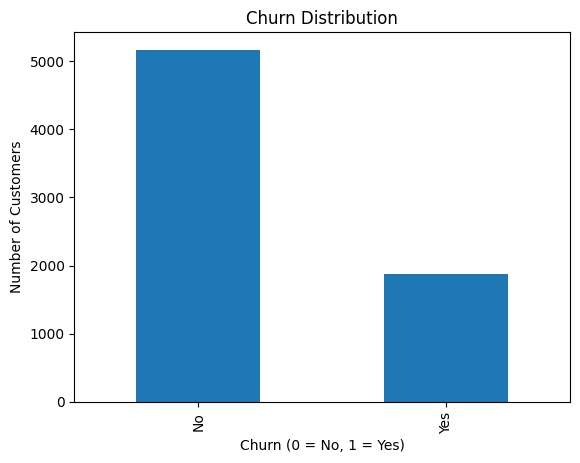

In [376]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


In [377]:
X=df[["tenure","MonthlyCharges","Contract","PaymentMethod","InternetService","TotalCharges"]]
Y=df["Churn"].map({"Yes":1,"No":0})


In [378]:
X["Contract"]=X["Contract"].map({'Month-to-month':1, 'One year':2, 'Two year':3})
X["InternetService"]=X["InternetService"].map({'DSL':1, 'Fiber optic':2, 'No':3})
X["PaymentMethod"]=X["PaymentMethod"].map({'Electronic check':1, 'Mailed check':2, 'Bank transfer (automatic)':3,'Credit card (automatic)':4})

C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\3838551561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Contract"]=X["Contract"].map({'Month-to-month':1, 'One year':2, 'Two year':3})
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\3838551561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["InternetService"]=X["InternetService"].map({'DSL':1, 'Fiber optic':2, 'No':3})
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\3838551561.py:3: SettingWithCopyWarning: 
A value is tryi

In [379]:
X

,tenure,MonthlyCharges,Contract,PaymentMethod,InternetService,TotalCharges
0,1,29.85,1,1,1,29.85
1,34,56.95,2,2,1,1889.5
2,2,53.85,1,2,1,108.15
3,45,42.30,2,3,1,1840.75
4,2,70.70,1,1,2,151.65
...,...,...,...,...,...,...
7038,24,84.80,2,2,1,1990.5
7039,72,103.20,2,4,2,7362.9
7040,11,29.60,1,1,1,346.45
7041,4,74.40,1,2,2,306.6


In [380]:
import pandas as pd

# Convert TotalCharges properly
X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")

# Fill missing values with median
X["TotalCharges"].fillna(X["TotalCharges"].median(), inplace=True)

C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\2807799426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_10544\2807799426.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the ori

In [381]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [385]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=42,class_weight="balanced")
y_pred=clf.fit(x_train,y_train)
Y_pred2=y_pred.predict(x_train)
Y_pred3=y_pred.predict(x_test)

In [386]:
from sklearn.metrics import accuracy_score
print("accuracy score Y_train",accuracy_score(y_train,Y_pred2))

print("accuracy_score y_test",accuracy_score(y_test,Y_pred3))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, Y_pred3))
print(classification_report(y_test, Y_pred3))


accuracy score Y_train 0.7351792687255946
accuracy_score y_test 0.7253371185237757
[[725 310]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409

